In [91]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [31]:
data = pd.read_csv('1.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Product Designer,25000,EUR,27777,IE,0,IE,S
1,2024,SE,FT,Software Engineer,313500,USD,313500,US,0,US,M
2,2024,SE,FT,Software Engineer,194000,USD,194000,US,0,US,M
3,2024,MI,FT,Encounter Data Management Professional,79500,USD,79500,US,100,US,M
4,2024,MI,FT,Encounter Data Management Professional,57700,USD,57700,US,100,US,M


In [27]:
data.groupby('work_year').size()

work_year
2020       75
2021      218
2022     1659
2023     8522
2024    46720
dtype: int64

In [35]:
# check for null
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [37]:
df = data.drop(columns=['salary', 'salary_currency'])
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Product Designer,27777,IE,0,IE,S
1,2024,SE,FT,Software Engineer,313500,US,0,US,M
2,2024,SE,FT,Software Engineer,194000,US,0,US,M
3,2024,MI,FT,Encounter Data Management Professional,79500,US,100,US,M
4,2024,MI,FT,Encounter Data Management Professional,57700,US,100,US,M


In [43]:
# US only
us_df = df.loc[df['employee_residence'] == 'US']

# Global
gl_df = df.loc[df['employee_residence'] != 'US']


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,EN,FT,Product Designer,27777,IE,0,IE,S
5,2024,MI,FT,Data Scientist,45000,AR,100,AR,M
6,2024,MI,FT,Data Scientist,30000,AR,100,AR,M
15,2024,SE,FT,Data Analyst,124620,AU,0,AU,M
16,2024,SE,FT,Data Analyst,111155,AU,0,AU,M
...,...,...,...,...,...,...,...,...,...
53830,2020,SE,FT,Machine Learning Engineer,45618,HR,100,HR,S
53831,2021,SE,FT,Data Scientist,168000,JP,0,JP,S
53832,2021,MI,FT,Data Scientist,119059,SG,100,IL,M
53834,2021,MI,FT,Data Engineer,28369,MT,50,MT,L


In [55]:
analyst = us_df.loc[us_df['job_title'].str.contains('AI')]
analyst['job_title'].unique()

array(['AI Engineer', 'AI Architect', 'AI Developer', 'AI Lead',
       'AI Product Manager', 'AI Researcher', 'AI Scientist',
       'AI Specialist', 'Head of AI', 'AI Machine Learning Engineer',
       'AI Product Owner', 'AI Solution Architect', 'Applied AI ML Lead',
       'AI Data Scientist', 'AI Software Engineer',
       'AI Research Engineer'], dtype=object)

In [147]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    else:
        return "Other"

In [153]:
job_titles = list(us_df['job_category'].unique())
job_titles

['Other', 'Data Science', 'Machine Learning', 'Data Engineering']

In [151]:
us_df['job_category'] = us_df['job_title'].apply(assign_broader_category)
us_df.head(10)

/var/folders/g7/pb5yn_cd5yd9v0z44m5p9ml40000gn/T/ipykernel_99063/1997857923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['job_category'] = us_df['job_title'].apply(assign_broader_category)


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
1,2024,Senior,Full-time,Software Engineer,313500,US,On-Site,US,M,Other
2,2024,Senior,Full-time,Software Engineer,194000,US,On-Site,US,M,Other
3,2024,Mid/Intermediate level,Full-time,Encounter Data Management Professional,79500,US,Full-Remote,US,M,Other
4,2024,Mid/Intermediate level,Full-time,Encounter Data Management Professional,57700,US,Full-Remote,US,M,Other
7,2024,Mid/Intermediate level,Full-time,Data Scientist,142600,US,On-Site,US,M,Data Science
8,2024,Mid/Intermediate level,Full-time,Data Scientist,81500,US,On-Site,US,M,Data Science
9,2024,Senior,Full-time,Machine Learning Engineer,237500,US,On-Site,US,M,Machine Learning
10,2024,Senior,Full-time,Machine Learning Engineer,137750,US,On-Site,US,M,Machine Learning
11,2024,Senior,Full-time,Machine Learning Scientist,250000,US,On-Site,US,M,Other
12,2024,Senior,Full-time,Machine Learning Scientist,145000,US,On-Site,US,M,Other


In [155]:
us_df['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [157]:
a = us_df.groupby(['job_category','company_size'])['salary_in_usd'].median().sort_values()
a

job_category      company_size
Data Engineering  S                72500.0
Data Science      S               107500.0
Machine Learning  S               121538.0
Data Engineering  L               129550.0
                  M               130000.0
Other             L               153000.0
Data Science      L               159100.0
Other             M               160000.0
Data Science      M               162000.0
Other             S               180000.0
Machine Learning  L               180550.0
                  M               192000.0
Name: salary_in_usd, dtype: float64

<Axes: ylabel='job_category,company_size'>

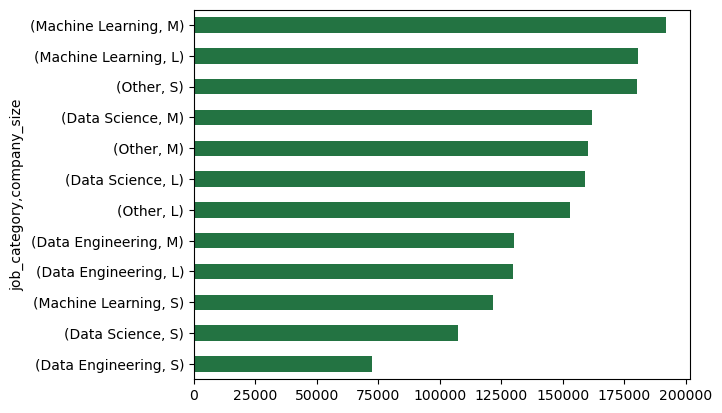

In [159]:
a.plot.barh(color='#237342')

In [121]:
us_df['experience_level'] = us_df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

us_df['employment_type'] = us_df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})

us_df['remote_ratio'] = us_df['remote_ratio'].astype(str)
us_df['remote_ratio'] = us_df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Half-Remote',
    '100' : 'Full-Remote',
})

/var/folders/g7/pb5yn_cd5yd9v0z44m5p9ml40000gn/T/ipykernel_99063/3132007276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['experience_level'] = us_df['experience_level'].replace({
/var/folders/g7/pb5yn_cd5yd9v0z44m5p9ml40000gn/T/ipykernel_99063/3132007276.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_df['employment_type'] = us_df['employment_type'].replace({
/var/folders/g7/pb5yn_cd5yd9v0z44m5p9ml40000gn/T/ipykernel_99063/3132007276.py:15: SettingWithCopyWarning: 
A value is trying to b

In [167]:
us_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
1,2024,Senior,Full-time,Software Engineer,313500,US,On-Site,US,M,Other
2,2024,Senior,Full-time,Software Engineer,194000,US,On-Site,US,M,Other
3,2024,Mid/Intermediate level,Full-time,Encounter Data Management Professional,79500,US,Full-Remote,US,M,Other
4,2024,Mid/Intermediate level,Full-time,Encounter Data Management Professional,57700,US,Full-Remote,US,M,Other
7,2024,Mid/Intermediate level,Full-time,Data Scientist,142600,US,On-Site,US,M,Data Science
...,...,...,...,...,...,...,...,...,...,...
53835,2021,Senior,Full-time,Data Specialist,165000,US,Full-Remote,US,L,Other
53836,2020,Senior,Full-time,Data Scientist,412000,US,Full-Remote,US,L,Data Science
53837,2021,Mid/Intermediate level,Full-time,Principal Data Scientist,151000,US,Full-Remote,US,L,Other
53838,2020,Entry level,Full-time,Data Scientist,105000,US,Full-Remote,US,S,Data Science


In [161]:
b = us_df.groupby(['job_category','experience_level'])['salary_in_usd'].median()
b

job_category      experience_level      
Data Engineering  Entry level                87500.0
                  Executive level           190000.0
                  Mid/Intermediate level    117000.0
                  Senior                    143706.0
Data Science      Entry level               136400.0
                  Executive level           210850.0
                  Mid/Intermediate level    148050.0
                  Senior                    170000.0
Machine Learning  Entry level               139650.0
                  Executive level           232750.0
                  Mid/Intermediate level    170000.0
                  Senior                    200000.0
Other             Entry level               100000.0
                  Executive level           200000.0
                  Mid/Intermediate level    140000.0
                  Senior                    171550.0
Name: salary_in_usd, dtype: float64

<Axes: ylabel='job_category,experience_level'>

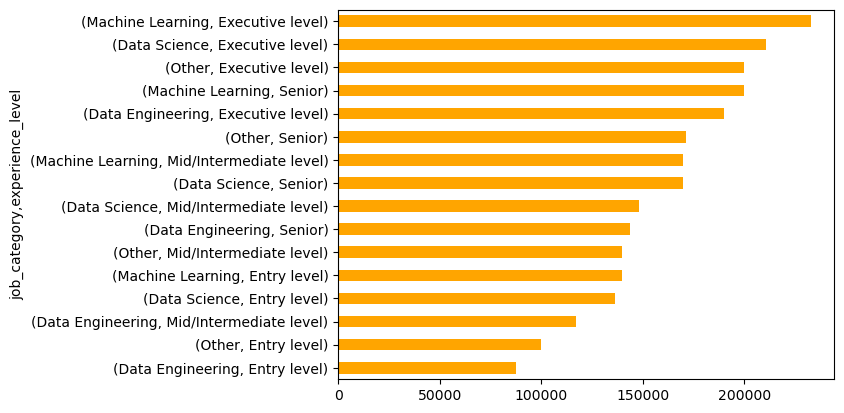

In [163]:
b.sort_values().plot.barh(color='orange')

In [135]:
us_df.loc[
    (us_df['job_category'] == 'Machine Learning') & 
    (us_df['experience_level'] == 'Executive level')
].shape[0] / len(us_df)

0.0006550665301944729

In [165]:
us_df.groupby(['job_category', 'experience_level']).size()

job_category      experience_level      
Data Engineering  Entry level                1885
                  Executive level             356
                  Mid/Intermediate level     3541
                  Senior                     7645
Data Science      Entry level                 616
                  Executive level             168
                  Mid/Intermediate level     3516
                  Senior                     7348
Machine Learning  Entry level                 260
                  Executive level              32
                  Mid/Intermediate level      855
                  Senior                     3305
Other             Entry level                1323
                  Executive level             530
                  Mid/Intermediate level     6126
                  Senior                    11344
dtype: int64

In [173]:
us_df.groupby(['work_year', 'job_category'])['salary_in_usd'].agg(['min', 'max', 'mean'])

min     max           mean
work_year job_category                                   
2020      Data Engineering   72000  188000  108000.000000
          Data Science      103000  450000  215140.909091
          Machine Learning  138000  250000  179333.333333
          Other              70000  190000  127750.000000
2021      Data Engineering   50000  200000  116709.848485
          Data Science       58000  250000  130630.434783
          Machine Learning   81000  270000  186166.666667
          Other              70000  423000  193000.000000
2022      Data Engineering   24000  324000  138858.258621
          Data Science       38000  350000  158085.956962
          Machine Learning   83000  248700  168752.021505
          Other              45600  405000  153412.687943
2023      Data Engineering   36000  750000  140127.540037
          Data Science       24000  750000  175351.709863
          Machine Learning   25500  750000  196008.063786
          Other              38000  750000  153292.411713
2024      Data Engineering   21099  750000  137512.998098
          Data Science       24000  750000  172455.842152
          Machine Learning   25000  550000  204368.249852
          Other              21099  750000  171584.548602

<Axes: xlabel='work_year,job_category'>

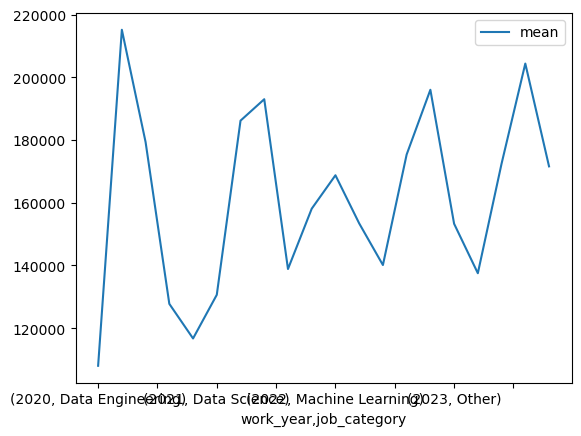

In [179]:
c = us_df.groupby(['work_year', 'job_category'])['salary_in_usd'].agg(['mean'])
c.plot.line()